**AI/ML Challenge**

**Author: Sharonne  Kemboi**

This challenge requires one to work on a dataset that contains news headlines - which are aimed to be written in a sarcastic manner by the news author. My job here is to build NLP models and predict whether the headline is sarcastic or not. 


Each record of the dataset consists of two attributes:



*  is_sarcastic: 1 if the record is sarcastic, otherwise 0. This is the target variable.
*  headline: this is the headline of the news article









In [1]:
!pip install textblob
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 **Importing Required libraries & Dependaencies**

In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import string
import contractions
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
plt.style.use("ggplot")
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from collections import Counter
import string
from textblob import TextBlob
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, f1_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Dataset

In [3]:
#reading of train data
df = pd.read_csv("/Train_Data.csv")

#reading of test data
df_test=pd.read_csv("/Train_Data.csv")



In [4]:
df.head() #train dataset

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


EDA & PRE-PROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44262 entries, 0 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      44262 non-null  object
 1   is_sarcastic  44262 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 691.7+ KB


In [6]:
df.describe(include="all")

,headline,is_sarcastic
count,44262,44262.000000
unique,27058,NaN
top,the 20 funniest tweets from women this week,NaN
freq,16,NaN
mean,NaN,0.458723
std,NaN,0.498299
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [7]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

Sarcastic: 20304
Not Sarcastic: 23958


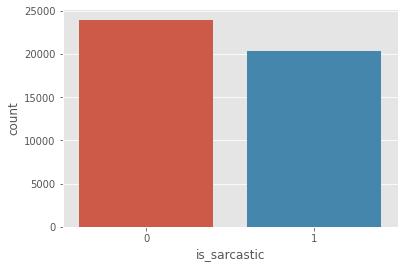

In [8]:
sns.countplot(x="is_sarcastic",data=df)  
print("Sarcastic: %s"%(df["is_sarcastic"].value_counts()[1]))
print("Not Sarcastic: %s"%(df["is_sarcastic"].value_counts()[0]))

 ## Data Preprocessing and Feature Engineering

In [9]:
df = df.drop_duplicates()

In [10]:
#lets split our training data using train_test_split...
X=df["headline"]
y=df["is_sarcastic"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101,stratify=y)

In [11]:
X_train

39414    democratic election sweep may complicate gop p...
17835    bend in road not sharp enough to merit so many...
9621     harlem shake' creators threaten legal action a...
32988    watch the moving lesbian storyline that got cu...
14180    childish gambino teases concept album explorin...
                               ...                        
22679    why south sudan's leaders are fueling the impl...
3291     martin o'malley fails to make ohio's president...
16196          trump ally sues qatar for hacking his email
9166     lindsey graham dining alone at applebee's kind...
20672    10 of the best cyber monday tv deals you'll ac...
Name: headline, Length: 18940, dtype: object

In [12]:
y_train.value_counts()

0    10050
1     8890
Name: is_sarcastic, dtype: int64

In [13]:
#Naive Bayes
pipeline=Pipeline([
    ("bag-of-words",CountVectorizer()),
    ("tf-idf",TfidfTransformer()),
    ("model",MultinomialNB())
])

In [14]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('tf-idf', TfidfTransformer()), ('model', MultinomialNB())])

In [15]:
pred=pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.8334565163833456

In [16]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4308
           1       0.88      0.75      0.81      3810

    accuracy                           0.83      8118
   macro avg       0.84      0.83      0.83      8118
weighted avg       0.84      0.83      0.83      8118

[[3912  396]
 [ 956 2854]]


In [17]:
#random forest
pipeline1=Pipeline([
    ("bag-of-words",CountVectorizer()),
    ("tf-idf",TfidfTransformer()),
    ("model",RandomForestClassifier(n_estimators=250))
])

In [18]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('tf-idf', TfidfTransformer()),
                ('model', RandomForestClassifier(n_estimators=250))])

In [19]:
pipeline1.score(X_test,y_test)
pred1=pipeline1.predict(X_test)

In [20]:
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4308
           1       0.79      0.80      0.79      3810

    accuracy                           0.80      8118
   macro avg       0.80      0.80      0.80      8118
weighted avg       0.81      0.80      0.80      8118

[[3491  817]
 [ 767 3043]]


In [21]:
#SVC classification model without hyperparamter tuning
pipeline2=Pipeline([
    ("bag-of-words",CountVectorizer()),
    ("tf-idf",TfidfTransformer()),
    ("model",SVC())
])

In [22]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('tf-idf', TfidfTransformer()), ('model', SVC())])

In [23]:
pipeline2.score(X_test,y_test)


0.8394924858339492

In [24]:
pred2=pipeline2.predict(X_test)

In [25]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#best accuracy

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4308
           1       0.82      0.84      0.83      3810

    accuracy                           0.84      8118
   macro avg       0.84      0.84      0.84      8118
weighted avg       0.84      0.84      0.84      8118

[[3603  705]
 [ 598 3212]]


In [26]:
df = df.drop_duplicates()

In [27]:
# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

In [28]:

# load up a simple porter stemmer - nothing fancy
lemmatizer = WordNetLemmatizer()


def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # lemmatizer
    document = ' '.join([lemmatizer.lemmatize(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)


In [29]:
import nltk
nltk.download('all')
df['clean_headline'] = stp(df['headline'].values)
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,headline,is_sarcastic,clean_headline
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote legalize worldly vice
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...
2,emily's list founder: women are the 'problem s...,0,emily list founder woman problem solver congress
3,send your kids back to school with confidence,0,send kid back school confidence
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health


In [30]:
df['char_count'] = df['headline'].apply(len)
df['word_count'] = df['headline'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df['upper_case_word_count'] = df['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [31]:
import textblob
df_snt_obj = df['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
df['Polarity'] = [obj.polarity for obj in df_snt_obj.values]
df['Subjectivity'] = [obj.subjectivity for obj in df_snt_obj.values]

In [32]:
df.head()

,headline,is_sarcastic,clean_headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote legalize worldly vice,53,9,5.300000,1,0,0,0.0,0.000000
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...,66,12,5.076923,0,0,0,0.0,0.066667
2,emily's list founder: women are the 'problem s...,0,emily list founder woman problem solver congress,65,10,5.909091,4,0,0,0.0,0.000000
3,send your kids back to school with confidence,0,send kid back school confidence,45,8,5.000000,0,0,0,0.0,0.000000
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health,41,6,5.857143,1,0,0,0.0,0.000000


In [33]:
df_metadata = df.drop(['headline', 'clean_headline'], axis=1).reset_index(drop=True)
df_metadata.head()

,is_sarcastic,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,1,53,9,5.300000,1,0,0,0.0,0.000000
1,1,66,12,5.076923,0,0,0,0.0,0.066667
2,0,65,10,5.909091,4,0,0,0.0,0.000000
3,0,45,8,5.000000,0,0,0,0.0,0.000000
4,0,41,6,5.857143,1,0,0,0.0,0.000000


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
df_tv = tv.fit_transform(df['clean_headline']).toarray()
df_tv = pd.DataFrame(np.round(df_tv, 2), columns=tv.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
df_combination = pd.concat([df_metadata, df_tv], axis=1)
df_combination.head()

,is_sarcastic,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,aaa,...,zoo,zookeeper,zoolander,zoologist,zoomed,zoroastrianism,zsa,zucker,zuckerberg,zz
0,1,53,9,5.300000,1,0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,66,12,5.076923,0,0,0,0.0,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,65,10,5.909091,4,0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,45,8,5.000000,0,0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,41,6,5.857143,1,0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(list(df['headline']))
norm_corpus

array(['supreme court votes legalize worldly vices',
       'hungover man horrified learn made dozens plans last night',
       'emilys list founder women problem solvers congress', ...,
       'fucker riding mans ass whole way cleveland',
       'pushy hermit crab girlfriend wants move',
       'coworker retreats remote corner office complete disgusting food order'],
      dtype='<U721')

In [37]:
df.headline.head()

0    supreme court votes 7-2 to legalize all worldl...
1    hungover man horrified to learn he made dozens...
2    emily's list founder: women are the 'problem s...
3        send your kids back to school with confidence
4            watch: experts talk pesticides and health
Name: headline, dtype: object

In [38]:
X = df.drop(['is_sarcastic'], axis = 1)
y = df['is_sarcastic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((21646, 10), (5412, 10))

In [39]:
Counter(y_train), Counter(y_test)

(Counter({1: 10189, 0: 11457}), Counter({0: 2901, 1: 2511}))

In [40]:
df

,headline,is_sarcastic,clean_headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote legalize worldly vice,53,9,5.300000,1,0,0,0.000000,0.000000
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...,66,12,5.076923,0,0,0,0.000000,0.066667
2,emily's list founder: women are the 'problem s...,0,emily list founder woman problem solver congress,65,10,5.909091,4,0,0,0.000000,0.000000
3,send your kids back to school with confidence,0,send kid back school confidence,45,8,5.000000,0,0,0,0.000000,0.000000
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health,41,6,5.857143,1,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
44243,gated community under siege by savages,1,gated community siege savage,38,6,5.428571,0,0,0,0.000000,0.000000
44245,watching the world destroy itself,0,watching world destroy,33,5,5.500000,0,0,0,-0.200000,0.000000
44249,fucker riding man's ass whole way out to cleve...,1,fucker riding man whole way cleveland,50,9,5.000000,1,0,0,0.200000,0.400000
44250,pushy hermit crab girlfriend wants to move in,1,pushy hermit crab girlfriend want move,45,8,5.000000,0,0,0,0.200000,0.100000


In [41]:
# calculate total number of words
X_train['word_count'] = X_train['headline'].apply(lambda x: len(x.split()))
# calculate total number of characters
X_train['char_count'] = X_train['headline'].apply(len)
# # calculate average word density
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
# calculate total number of characters
X_test['char_count'] = X_test['headline'].apply(len)
# calculate total number of words
X_test['word_count'] = X_test['headline'].apply(lambda x: len(x.split()))
# calculate average word density
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
# calculate total number of punctuaction marks
X_test['punctuation_count'] = X_test['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
# calculate total number of title-cased words
X_test['title_word_count'] = X_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
# calculate total number of upper-cased words
X_test['upper_case_word_count'] = X_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [42]:
X_train.head()

,headline,clean_headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
20316,frazzled robert mueller walking around with pi...,frazzled robert mueller walking around piece r...,100,15,6.250000,0,0,0,0.000000,0.000000
22430,ballet hispánico is giving latino artists a vo...,ballet hisp nico giving latino artist voice de...,62,10,5.636364,0,0,0,0.000000,0.000000
3637,porn actress very nearly appears to enjoy ejac...,porn actress nearly appears enjoy ejaculation ...,61,10,5.545455,0,0,0,0.265000,0.510000
22481,less than half of the money pledged to fight e...,le half money pledged fight ebola reached affe...,77,13,5.500000,0,0,0,-0.166667,0.116667
8211,smoking ban collapses fragile prison economy,smoking ban collapse fragile prison economy,44,6,6.285714,0,0,0,0.000000,0.500000


In [43]:
X_train.drop(columns=['title_word_count', 'upper_case_word_count'], inplace=True, axis=0)
X_test.drop(columns=['title_word_count', 'upper_case_word_count'], inplace=True, axis=0)

In [44]:
X_train.head()

,headline,clean_headline,char_count,word_count,word_density,punctuation_count,Polarity,Subjectivity
20316,frazzled robert mueller walking around with pi...,frazzled robert mueller walking around piece r...,100,15,6.250000,0,0.000000,0.000000
22430,ballet hispánico is giving latino artists a vo...,ballet hisp nico giving latino artist voice de...,62,10,5.636364,0,0.000000,0.000000
3637,porn actress very nearly appears to enjoy ejac...,porn actress nearly appears enjoy ejaculation ...,61,10,5.545455,0,0.265000,0.510000
22481,less than half of the money pledged to fight e...,le half money pledged fight ebola reached affe...,77,13,5.500000,0,-0.166667,0.116667
8211,smoking ban collapses fragile prison economy,smoking ban collapse fragile prison economy,44,6,6.285714,0,0.000000,0.500000


In [45]:
# calculate review's sentiment 
x_train_snt_obj = X_train['headline'].apply(lambda row: TextBlob(row).sentiment)
# create a column for polarity scores
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
# create a column for subjectivity scores
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

# calculate review's sentiment 
x_test_snt_obj = X_test['headline'].apply(lambda row: TextBlob(row).sentiment)
# create a column for polarity scores
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
# create a column for subjectivity scores
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [46]:
X_train.head()

,headline,clean_headline,char_count,word_count,word_density,punctuation_count,Polarity,Subjectivity
20316,frazzled robert mueller walking around with pi...,frazzled robert mueller walking around piece r...,100,15,6.250000,0,0.000000,0.000000
22430,ballet hispánico is giving latino artists a vo...,ballet hisp nico giving latino artist voice de...,62,10,5.636364,0,0.000000,0.000000
3637,porn actress very nearly appears to enjoy ejac...,porn actress nearly appears enjoy ejaculation ...,61,10,5.545455,0,0.265000,0.510000
22481,less than half of the money pledged to fight e...,le half money pledged fight ebola reached affe...,77,13,5.500000,0,-0.166667,0.116667
8211,smoking ban collapses fragile prison economy,smoking ban collapse fragile prison economy,44,6,6.285714,0,0.000000,0.500000


In [47]:
# load stopwords default nltk list
stop_words = stopwords.words('english')

# load up a simple porter stemmer - nothing fancy
ps = PorterStemmer()

def simple_text_preprocessor(document):
    """Perform basic text pre-processing tasks."""
    
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

# vectorize function
stp = np.vectorize(simple_text_preprocessor)

In [48]:
# create a new column with cleaned text
X_train['Clean Headline'] = stp(X_train['headline'].values)
X_test['Clean Headline'] = stp(X_test['headline'].values)

# check first 5 rows
X_train.head()

,headline,clean_headline,char_count,word_count,word_density,punctuation_count,Polarity,Subjectivity,Clean Headline
20316,frazzled robert mueller walking around with pi...,frazzled robert mueller walking around piece r...,100,15,6.250000,0,0.000000,0.000000,frazzl robert mueller walk around piec russia ...
22430,ballet hispánico is giving latino artists a vo...,ballet hisp nico giving latino artist voice de...,62,10,5.636364,0,0.000000,0.000000,ballet hisp nico give latino artist voic deserv
3637,porn actress very nearly appears to enjoy ejac...,porn actress nearly appears enjoy ejaculation ...,61,10,5.545455,0,0.265000,0.510000,porn actress veri nearli appear enjoy ejacul face
22481,less than half of the money pledged to fight e...,le half money pledged fight ebola reached affe...,77,13,5.500000,0,-0.166667,0.116667,less half money pledg fight ebola reach affect...
8211,smoking ban collapses fragile prison economy,smoking ban collapse fragile prison economy,44,6,6.285714,0,0.000000,0.500000,smoke ban collaps fragil prison economi


In [49]:
X_train_metadata = X_train.drop(['headline', 'Clean Headline'], axis=1).reset_index(drop=True)
X_test_metadata = X_test.drop(['headline', 'Clean Headline'], axis=1).reset_index(drop=True)

In [50]:
X_train_metadata.head()

,clean_headline,char_count,word_count,word_density,punctuation_count,Polarity,Subjectivity
0,frazzled robert mueller walking around piece r...,100,15,6.250000,0,0.000000,0.000000
1,ballet hisp nico giving latino artist voice de...,62,10,5.636364,0,0.000000,0.000000
2,porn actress nearly appears enjoy ejaculation ...,61,10,5.545455,0,0.265000,0.510000
3,le half money pledged fight ebola reached affe...,77,13,5.500000,0,-0.166667,0.116667
4,smoking ban collapse fragile prison economy,44,6,6.285714,0,0.000000,0.500000


In [51]:
# instatiate vectorizer
cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1))

# fit vectorizer to 'Clean Review' and convert it to numpy array
X_traincv = cv.fit_transform(X_train['Clean Headline']).toarray()
# create a pandas DataFrame
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

# use vectorizer to transform 'Clean Review' and convert it to numpy array
X_testcv = cv.transform(X_test['Clean Headline']).toarray()
# create a pandas DataFrame
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())

# check first 5 rows
X_traincv.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaron,aarp,aatish,ab,abandon,abaya,abba,abbey,abbi,...,zogbi,zohan,zombi,zone,zoo,zookeep,zoologist,zoom,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import pandas as pd

In [ ]:
# concatenate the 2 dataframes
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

# check first 5 rows
X_train_comb.head()

In [ ]:
lr = LogisticRegression(C=1, penalty='l2', random_state=42, solver='liblinear')
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions))

In [1]:
a = [ ] while(1): a.append('1')

SyntaxError: ignored